In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Loading the data
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# ***Exploratory Data Analysis***

In [ ]:
df.shape

(14640, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

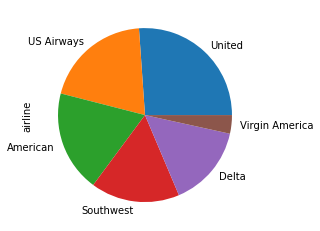

In [ ]:
df.airline.value_counts().plot(kind='pie')

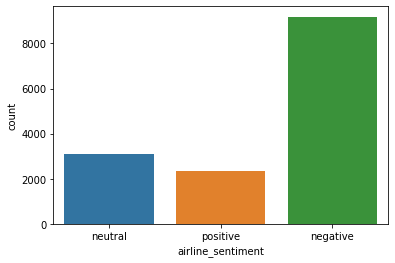

In [ ]:
sns.countplot(x='airline_sentiment',data=df)

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


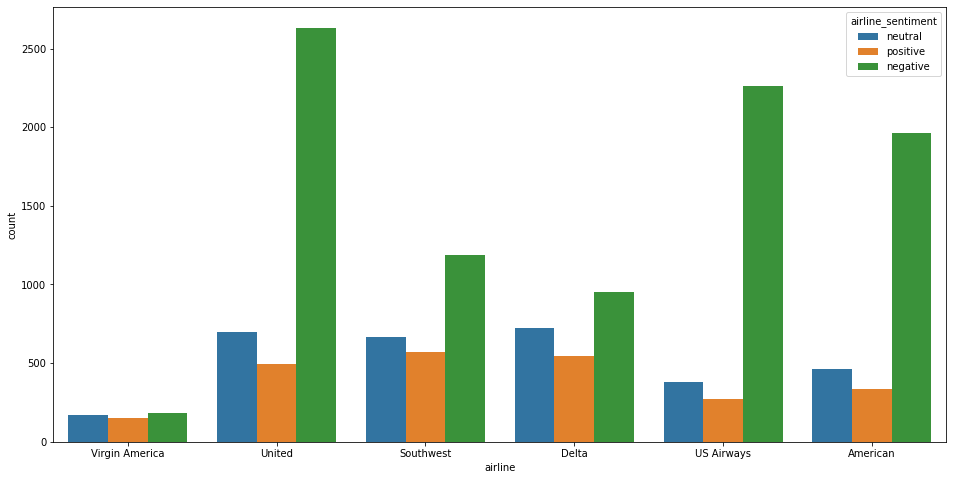

In [ ]:
print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
plt.figure(figsize=(16,8))
sns.countplot(x='airline',hue='airline_sentiment',data=df)

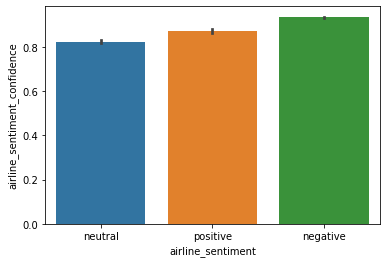

In [ ]:
sns.barplot(x='airline_sentiment',y='airline_sentiment_confidence',data=df)

Neagtive sentiment reasons
 [nan 'Bad Flight' "Can't Tell" 'Late Flight' 'Customer Service Issue'
 'Flight Booking Problems' 'Lost Luggage' 'Flight Attendant Complaints'
 'Cancelled Flight' 'Damaged Luggage' 'longlines']


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

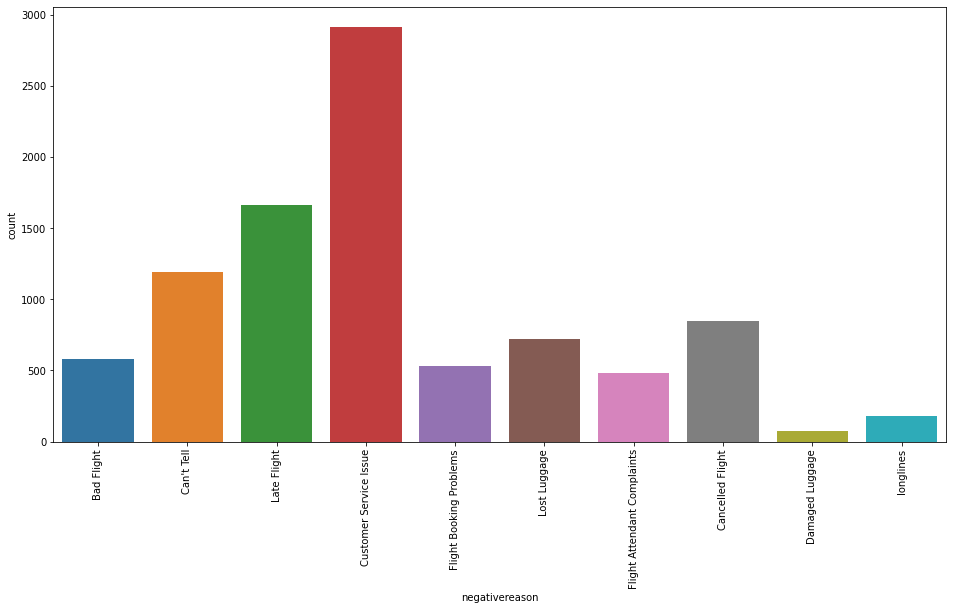

In [ ]:
print("Neagtive sentiment reasons\n", df['negativereason'].unique())
plt.figure(figsize=(16,8))
neg_reasons_plot = sns.countplot(x='negativereason', data=df)
plt.xticks(rotation=90)

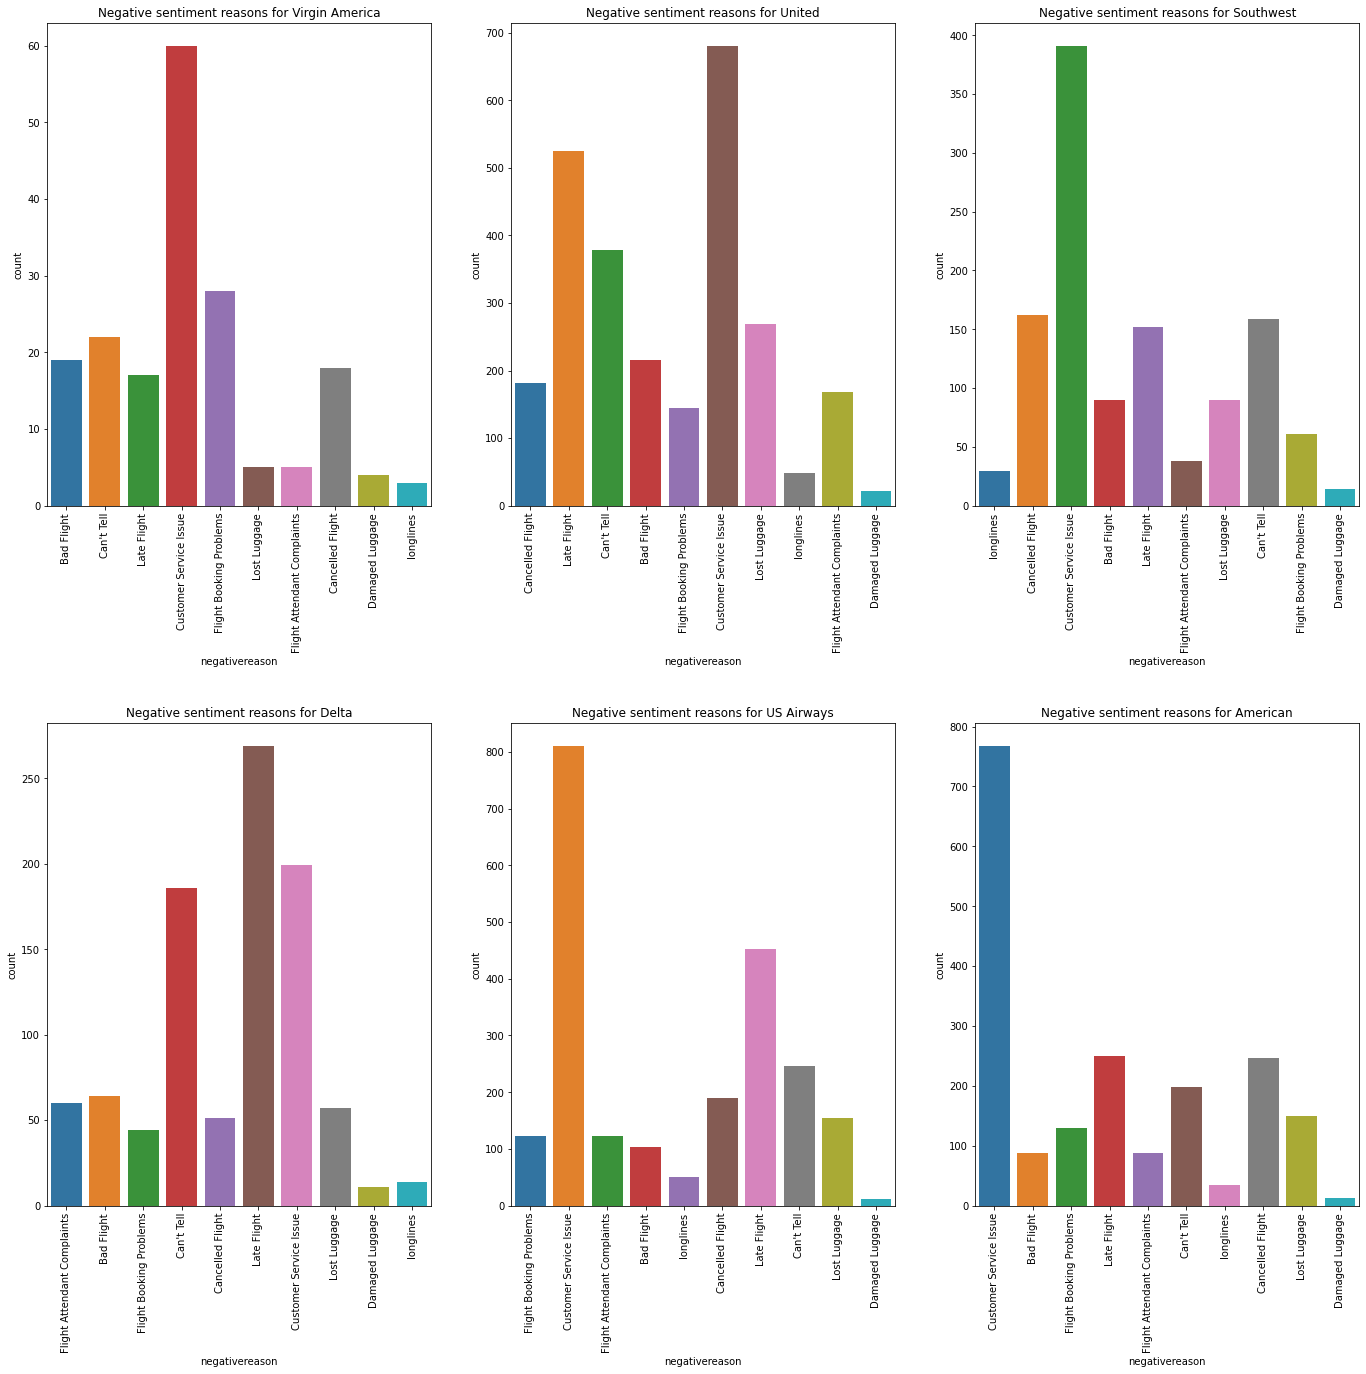

In [ ]:
def plot_neg_reasons(airline_name):
  new_df = df[df['airline'] == airline_name]
  reasons_df = new_df[['airline', 'negativereason']]
  sns.countplot(x='negativereason', data=reasons_df)
  plt.xticks(rotation=90)

airlines = list(df['airline'].unique())
plt.figure(figsize=(20,20))

for i in range(len(airlines)):
  plt.subplot(2,3,i+1)
  plt.title(f"Negative sentiment reasons for {airlines[i]}")
  plt.tight_layout(pad=4)
  plot_neg_reasons(airlines[i])

In [ ]:
print(f"Tweets from {len(pd.to_datetime(df['tweet_created']).dt.date.unique())} distinct dates are present in dataset")

Tweets from 9 distinct dates are present in dataset


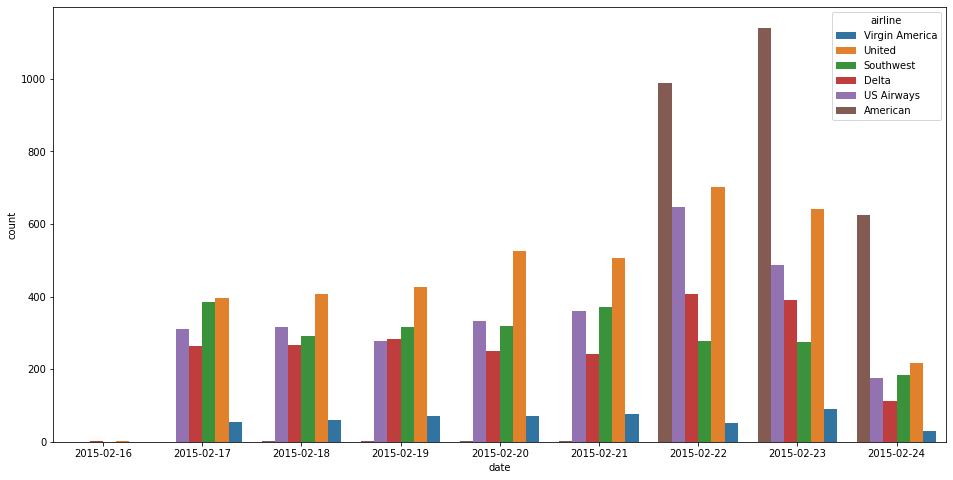

In [ ]:
new_df = df.loc[:,['airline', 'airline_sentiment']]
new_df['date'] = pd.to_datetime(df['tweet_created']).dt.date
plt.figure(figsize=(16,8))
date_plot = sns.countplot(x='date',hue='airline',data=new_df)
date_plot.invert_xaxis()

In [ ]:
print("Percentage null or na values in df")
print(((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2))

Percentage null or na values in df
tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64


In [ ]:
del df['tweet_coord']
del df['airline_sentiment_gold']
del df['negativereason_gold']
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# ***Preprocessing the data***

In [ ]:
def clean_tweet(tweet):
  without_mentions = " ".join(filter(lambda x:x[0]!='@', tweet.split()))
  letters_only = re.sub("[^a-zA-Z]", " ",without_mentions) 
  words = letters_only.lower().split()    
  stops = set(stopwords.words("english"))                  
  meaningful_words = [w for w in words if not w in stops and len(w) > 2] 
  lemmatizer = WordNetLemmatizer()
  lemmas = [lemmatizer.lemmatize(word) for word in meaningful_words]
  return " ".join(lemmas)

df['clean_tweet']=df['text'].apply(lambda x: clean_tweet(x))
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,clean_tweet
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),said
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus added commercial experience tacky
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),today must mean need take another trip
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing


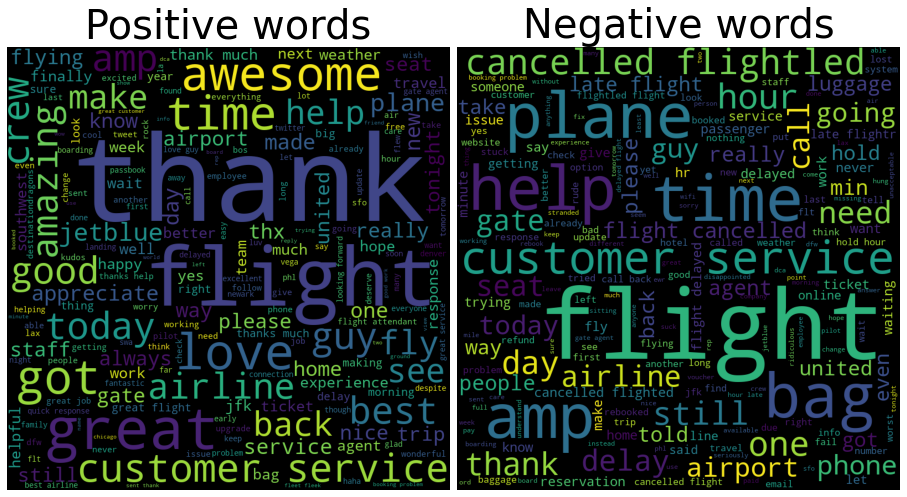

In [ ]:
new_df = df[df['airline_sentiment']=='positive']
words = ' '.join(new_df['clean_tweet'])
positive_words = " ".join([word for word in words.split()
                            if 'http' not in word
                                and word != 'RT'
                            ])

new_df = df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['clean_tweet'])
negative_words = " ".join([word for word in words.split()
                            if 'http' not in word
                                and word != 'RT'
                            ])

positive_wordcloud = WordCloud(stopwords=STOPWORDS, width = 800, height = 800, min_font_size = 10).generate(positive_words) 

negative_wordcloud = WordCloud(stopwords=STOPWORDS, width = 800, height = 800, min_font_size = 10).generate(negative_words) 

fig = plt.figure(figsize = (16, 16))
grid = ImageGrid(fig, 111, nrows_ncols = (1, 2), axes_pad = 0.1,)

for ax, im in zip(grid, [positive_wordcloud, negative_wordcloud]):
    ax.set_axis_off()
    if im == positive_wordcloud:
      ax.set_title('Positive words', fontdict = {'fontsize' : 40})
    else:
      ax.set_title('Negative words', fontdict = {'fontsize' : 40})
    ax.imshow(im)

plt.show()

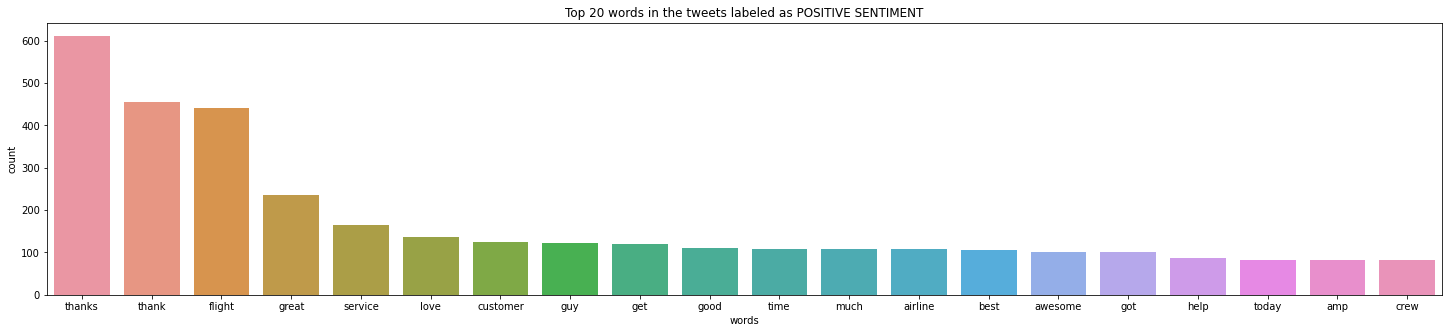

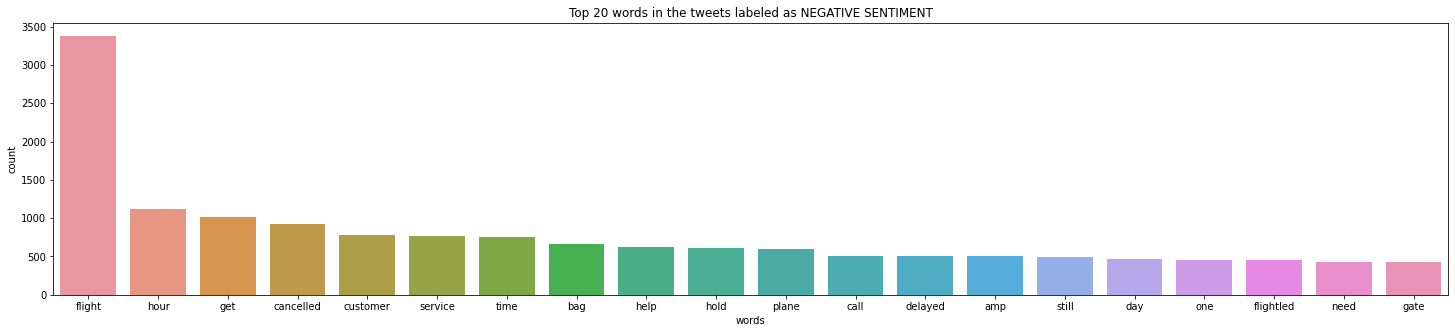

In [ ]:
list_pos_words = [ x for x in positive_words.split()]
freq_dis_pos = nltk.FreqDist(list_pos_words)
freq_dataframe = pd.DataFrame({'words': list(freq_dis_pos.keys()), 'count': list(freq_dis_pos.values())})
freq_dataframe = freq_dataframe.nlargest(columns="count", n = 20)
plt.figure(figsize=(25,5))
ax = sns.barplot(data=freq_dataframe, x= "words", y = "count")
ax.set(ylabel = 'count')
plt.title("Top 20 words in the tweets labeled as POSITIVE SENTIMENT")
plt.show()

list_neg_words = [ x for x in negative_words.split()]
freq_dis_pos = nltk.FreqDist(list_neg_words)
freq_dataframe = pd.DataFrame({'words': list(freq_dis_pos.keys()), 'count': list(freq_dis_pos.values())})
freq_dataframe = freq_dataframe.nlargest(columns="count", n = 20)
plt.figure(figsize=(25,5))
ax = sns.barplot(data=freq_dataframe, x= "words", y = "count")
ax.set(ylabel = 'count')
plt.title("Top 20 words in the tweets labeled as NEGATIVE SENTIMENT")
plt.show()

In [ ]:
vectorizer = TfidfVectorizer(max_features = 5000)
X = vectorizer.fit_transform(df['clean_tweet']).toarray()
def sentiment2target(sentiment):
    return {
        'negative': 0,
        'neutral': 1,
        'positive' : 2
    }[sentiment]

y = df['airline_sentiment'].apply(sentiment2target)

# ***Multinomial Naive Bayes***

In [ ]:
#Predicting sentiment using Multinomial Naive Bayes
scores = {key: [] for key in ["f1", "precision", "recall" ,"accuracy"]}
mnb = MultinomialNB()
for train_index, test_index in KFold(n_splits = 5).split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  y_pred = mnb.fit(X_train, y_train).predict(X_test)
  print("Number of mislabeled points out of a total %d points : %d" 
        % (X_test.shape[0], (y_test != y_pred).sum()))
  scores["f1"].append(f1_score(y_pred, y_test, average='weighted'))
  scores["precision"].append(precision_score(y_pred, y_test, zero_division=True, average='weighted'))
  scores["recall"].append(recall_score(y_pred, y_test, average='weighted'))
  scores["accuracy"].append(accuracy_score(y_pred, y_test))


mnb_f1 = np.mean(scores["f1"])
mnb_precision = np.mean(scores["precision"])
mnb_recall = np.mean(scores["recall"])
mnb_accuracy = np.mean(scores["accuracy"])

print("Mean f1 : ", mnb_f1)
print("Mean precision : ", mnb_precision)
print("Mean recall : ", mnb_recall)
print("Mean accuracy : ", mnb_accuracy)

Number of mislabeled points out of a total 2928 points : 835
Number of mislabeled points out of a total 2928 points : 933
Number of mislabeled points out of a total 2928 points : 1281
Number of mislabeled points out of a total 2928 points : 567
Number of mislabeled points out of a total 2928 points : 662
Mean f1 :  0.7639844918099238
Mean precision :  0.9021686877841469
Mean recall :  0.7077868852459016
Mean accuracy :  0.7077868852459016


# ***Complement Naive Bayes***

In [ ]:
#Predicting sentiment using Complement Naive Bayes
scores = {key: [] for key in ["f1", "precision", "recall" ,"accuracy"]}
cnb = ComplementNB()
for train_index, test_index in KFold(n_splits = 5).split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  y_pred = cnb.fit(X_train, y_train).predict(X_test)
  print("Number of mislabeled points out of a total %d points : %d" 
        % (X_test.shape[0], (y_test != y_pred).sum()))
  scores["f1"].append(f1_score(y_pred, y_test, average='weighted'))
  scores["precision"].append(precision_score(y_pred, y_test, zero_division=True, average='weighted'))
  scores["recall"].append(recall_score(y_pred, y_test, average='weighted'))
  scores["accuracy"].append(accuracy_score(y_pred, y_test))


cnb_f1 = np.mean(scores["f1"])
cnb_precision = np.mean(scores["precision"])
cnb_recall = np.mean(scores["recall"])
cnb_accuracy = np.mean(scores["accuracy"])

print("Mean f1 : ", cnb_f1)
print("Mean precision : ", cnb_precision)
print("Mean recall : ", cnb_recall)
print("Mean accuracy : ", cnb_accuracy)

Number of mislabeled points out of a total 2928 points : 736
Number of mislabeled points out of a total 2928 points : 830
Number of mislabeled points out of a total 2928 points : 970
Number of mislabeled points out of a total 2928 points : 579
Number of mislabeled points out of a total 2928 points : 643
Mean f1 :  0.7467092771941768
Mean precision :  0.7568214085030871
Mean recall :  0.7433060109289618
Mean accuracy :  0.7433060109289618


# ***Support Vector Machine***

In [ ]:
#Predicting sentiment using Support Vector Machine
scores = {key: [] for key in ["f1", "precision", "recall" ,"accuracy"]}
svm_linear = svm.SVC(kernel='linear')

for train_index, test_index in KFold(n_splits = 5).split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  y_pred = svm_linear.fit(X_train, y_train).predict(X_test)
  print("Number of mislabeled points out of a total %d points : %d" 
        % (X_test.shape[0], (y_test != y_pred).sum()))
  scores["f1"].append(f1_score(y_pred, y_test, average='weighted'))
  scores["precision"].append(precision_score(y_pred, y_test, zero_division=True, average='weighted'))
  scores["recall"].append(recall_score(y_pred, y_test, average='weighted'))
  scores["accuracy"].append(accuracy_score(y_pred, y_test))

print()

svm_linear_f1 = np.mean(scores["f1"])
svm_linear_precision = np.mean(scores["precision"])
svm_linear_recall = np.mean(scores["recall"])
svm_linear_accuracy = np.mean(scores["accuracy"])

print("Mean f1 : ", svm_linear_f1)
print("Mean precision : ", svm_linear_precision)
print("Mean recall : ", svm_linear_recall)
print("Mean accuracy : ", svm_linear_accuracy)

Number of mislabeled points out of a total 2928 points : 674
Number of mislabeled points out of a total 2928 points : 714
Number of mislabeled points out of a total 2928 points : 897
Number of mislabeled points out of a total 2928 points : 521
Number of mislabeled points out of a total 2928 points : 588

Mean f1 :  0.7786570666939784
Mean precision :  0.8046101212375815
Mean recall :  0.7681693989071039
Mean accuracy :  0.7681693989071039


# ***Random Forest Classifier***

In [ ]:
#Predicting sentiment using Random Forest Classifier
scores = {key: [] for key in ["f1", "precision", "recall" ,"accuracy"]}
rfc = RandomForestClassifier(n_estimators = 100, random_state = 0)

for train_index, test_index in KFold(n_splits = 5).split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  y_pred = rfc.fit(X_train, y_train).predict(X_test)
  print("Number of mislabeled points out of a total %d points : %d" 
        % (X_test.shape[0], (y_test != y_pred).sum()))
  scores["f1"].append(f1_score(y_pred, y_test, average='weighted'))
  scores["precision"].append(precision_score(y_pred, y_test, zero_division=True, average='weighted'))
  scores["recall"].append(recall_score(y_pred, y_test, average='weighted'))
  scores["accuracy"].append(accuracy_score(y_pred, y_test))

print()

rfc_f1 = np.mean(scores["f1"])
rfc_precision = np.mean(scores["precision"])
rfc_recall = np.mean(scores["recall"])
rfc_accuracy = np.mean(scores["accuracy"])

print("Mean f1 : ", rfc_f1)
print("Mean precision : ", rfc_precision)
print("Mean recall : ", rfc_recall)
print("Mean accuracy : ", rfc_accuracy)

Number of mislabeled points out of a total 2928 points : 710
Number of mislabeled points out of a total 2928 points : 822
Number of mislabeled points out of a total 2928 points : 980
Number of mislabeled points out of a total 2928 points : 565
Number of mislabeled points out of a total 2928 points : 589

Mean f1 :  0.7632815601235784
Mean precision :  0.7951955671207693
Mean recall :  0.7495901639344262
Mean accuracy :  0.7495901639344262


# ***XGBoost with Randomized Grid Search***

In [ ]:
params = {
    "colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
    "gamma": [0.1, 0.3, 0.5, 0.7],
    "learning_rate": [0.05, 0.1, 0.2, 0.4],
    "max_depth": [3, 4, 5, 6, 7],
    "n_estimators": [100, 200, 300, 400, 500],
    "subsample": [0.4, 0.6, 0.8]
}

search = RandomizedSearchCV(XGBClassifier(), param_distributions=params, random_state=42, n_iter=4, cv=4 , refit = 'f1_weighted',
                            scoring=['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted'] ,verbose=3, n_jobs=-1, return_train_score=True)

search.fit(X, y)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed: 255.1min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                             

In [ ]:
print("Best Parameters :")
search.best_params_

Best Parameters :


{'colsample_bytree': 1.0,
 'gamma': 0.3,
 'learning_rate': 0.4,
 'max_depth': 7,
 'n_estimators': 200,
 'subsample': 0.8}

In [ ]:
print("Best estimator :")
search.best_estimator_

Best estimator :


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.3,
              learning_rate=0.4, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
pd.DataFrame(search.cv_results_)[['mean_test_f1_weighted', 'mean_test_precision_weighted', 'mean_test_recall_weighted', 'mean_test_accuracy']]

,mean_test_f1_weighted,mean_test_precision_weighted,mean_test_recall_weighted,mean_test_accuracy
0,0.734461,0.736920,0.748839,0.748839
1,0.740479,0.739954,0.750068,0.750068
2,0.718169,0.725214,0.740232,0.740232
3,0.646003,0.684889,0.704850,0.704850


In [ ]:
xgb_search_f1 = np.max(search.cv_results_['mean_test_f1_weighted'])
xgb_search_precision = np.max(search.cv_results_['mean_test_precision_weighted'])
xgb_search_recall = np.max(search.cv_results_['mean_test_recall_weighted'])
xgb_search_accuracy = np.max(search.cv_results_['mean_test_accuracy'])

print("Max f1 achieved : ", xgb_search_f1)
print("Max precision achieved : ", xgb_search_precision)
print("Max recall achieved : ", xgb_search_recall)
print("Max accuracy achieved : ", xgb_search_accuracy)

Max f1 achieved :  0.7404792428135559
Max precision achieved :  0.7399535696455625
Max recall achieved :  0.750068306010929
Max accuracy achieved :  0.750068306010929


# ***Comparing different models***

  model     metric     score
0   mnb         f1  0.763984
1   mnb  precision  0.902169
2   mnb     recall  0.707787
3   mnb   accuracy  0.707787
4   cnb         f1  0.746709


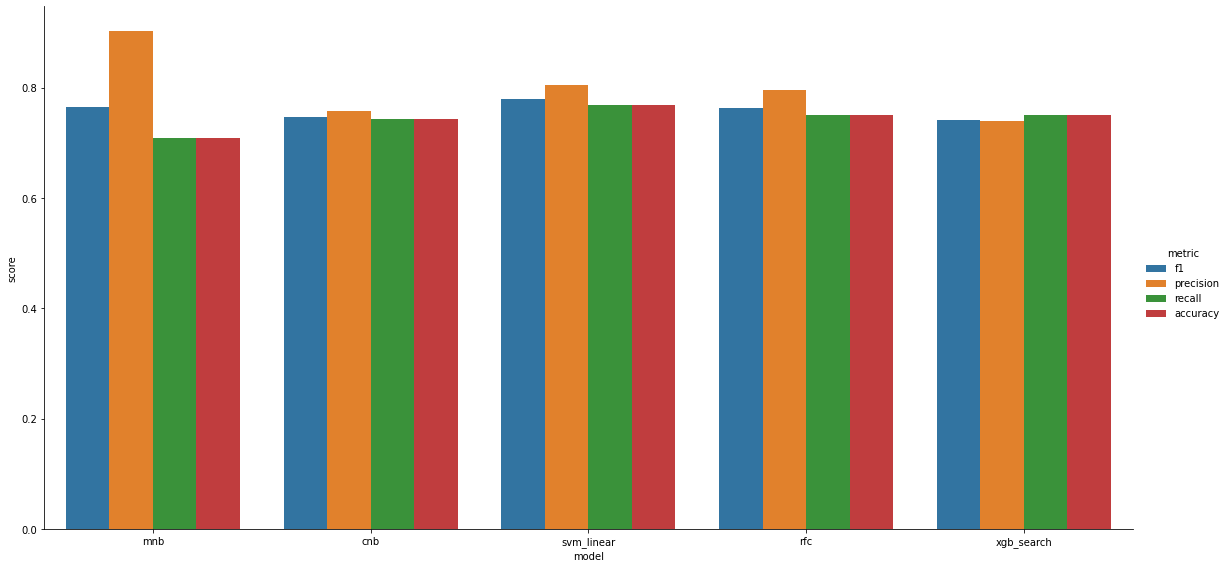

In [ ]:
model_list = 4*["mnb"] + 4*["cnb"] + 4*["svm_linear"] + 4*["rfc"] + 4*["xgb_search"]
metric_list = 5*["f1", "precision", "recall", "accuracy"]
score_list = []

for i in range(len(model_list)):
  metric = model_list[i] + "_" + metric_list[i]
  score_list.append(vars()[metric])

metric_data = pd.DataFrame({
    "model": model_list,
    "metric": metric_list,
    "score": score_list
})
print(metric_data.head())
sns.catplot(x='model', y='score', hue='metric', kind="bar", data=metric_data, height=8, aspect=2)

In [ ]:
for i in range(4):
  ind = 4*(np.array([metric_data['score'][j*4+i] for j in range(5)]).argmax())+i
  info = f"Max value for {metric_list[ind]} metric is {metric_data['score'][ind]} from {model_list[ind]} model"
  print(info)

Max value for f1 metric is 0.7786570666939784 from svm_linear model
Max value for precision metric is 0.9021686877841469 from mnb model
Max value for recall metric is 0.7681693989071039 from svm_linear model
Max value for accuracy metric is 0.7681693989071039 from svm_linear model


In [ ]:
# Saving the models
joblib.dump(mnb, 'Multinomial_Naive_Bayes_Classfier.pkl')
joblib.dump(cnb, 'Complement_Naive_Bayes_Classfier.pkl')
joblib.dump(svm_linear, 'SVM_Classfier_Linear.pkl')
joblib.dump(rfc, 'Random_Forest_Classfier.pkl')
joblib.dump(search, 'XGBoost_Classifier.pkl')